In [1]:
import mkl
mkl.set_dynamic(0)

8

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [4]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.shape

(50, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


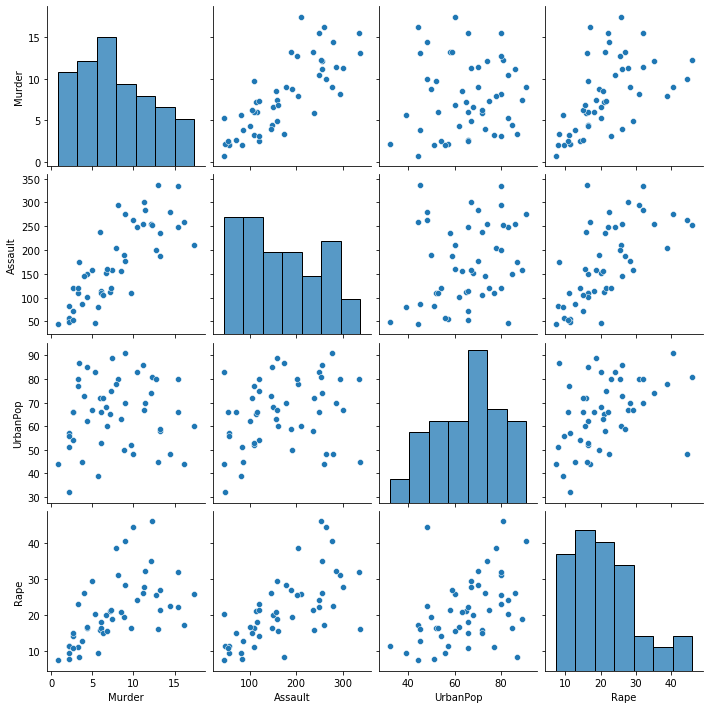

In [8]:
sns.pairplot(df)

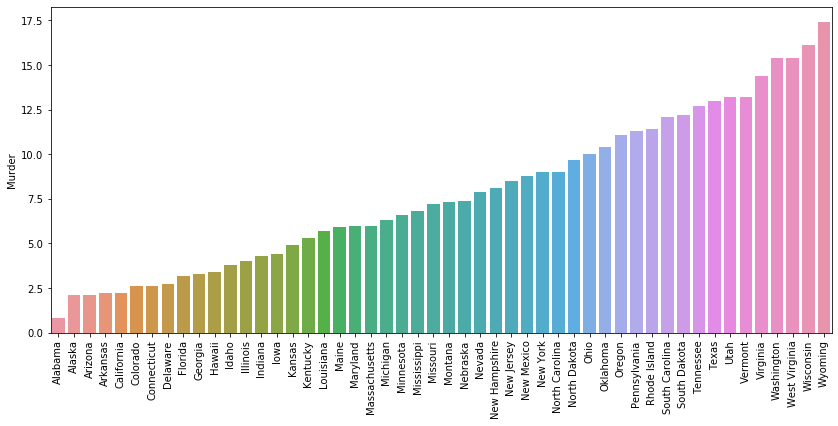

In [9]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Murder", x = df.index, data = df, order = df.Murder.values.sort())
plt.xticks(rotation = 90);

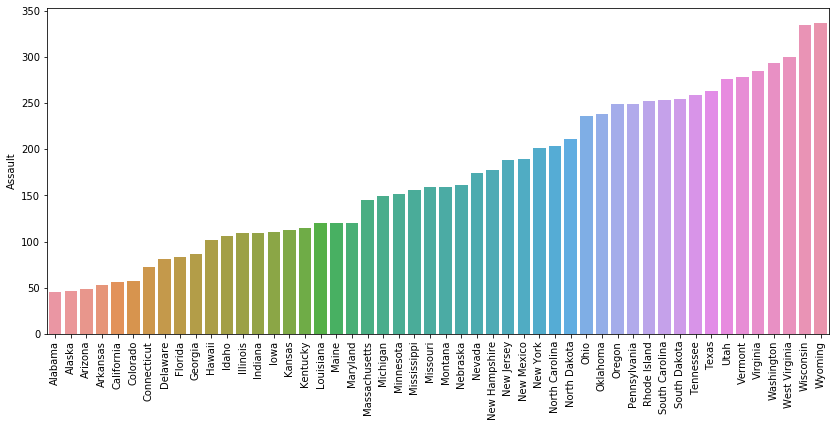

In [10]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Assault", x = df.index, data = df, order = df.Assault.values.sort())
plt.xticks(rotation = 90);

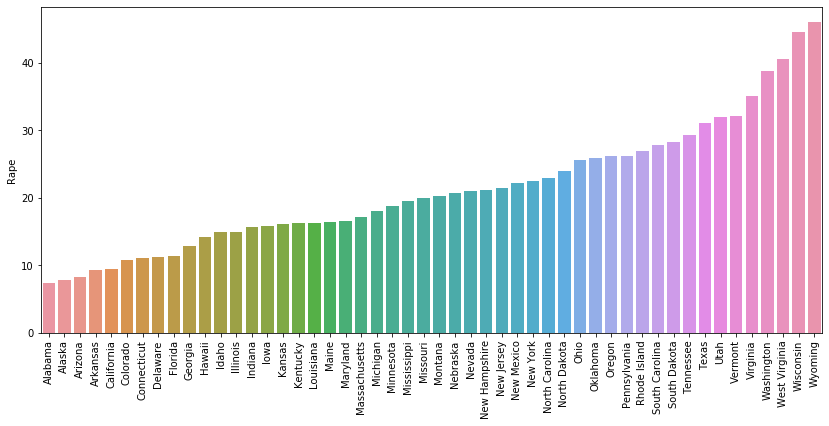

In [11]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Rape", x = df.index, data = df, order = df.Rape.values.sort())
plt.xticks(rotation = 90);

In [14]:
from pyclustertend import hopkins

In [15]:
hopkins(df, df.shape[0])

0.3271789988668859

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale

In [19]:
df.shape[0]

50

In [20]:
hopkins(MinMaxScaler().fit_transform(df), 50)

0.19912495732515062

In [21]:
hopkins(StandardScaler().fit_transform(df), 50)

0.20435626555465564

In [22]:
scaler = MinMaxScaler()

In [23]:
X = scaler.fit_transform(df)

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
hc_ward = linkage(y = df, method = "ward")
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

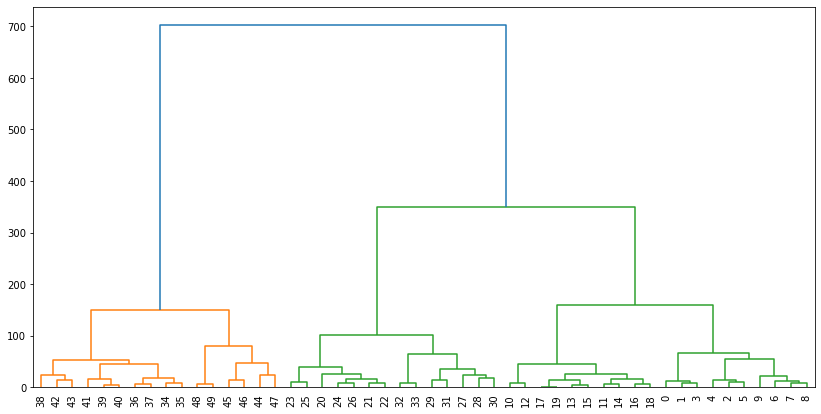

In [27]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

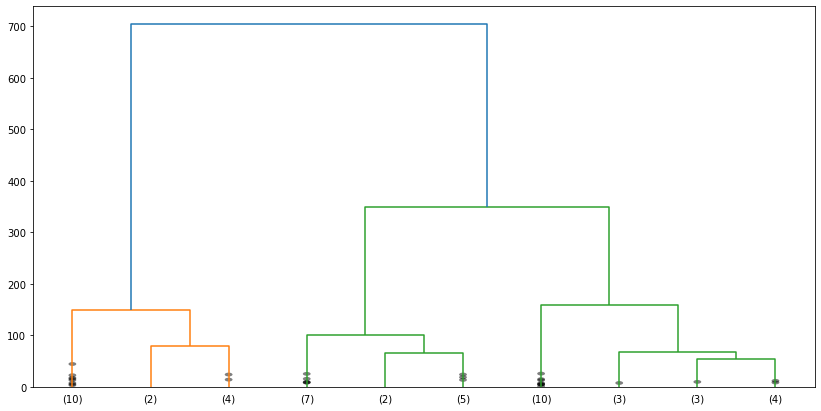

In [28]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

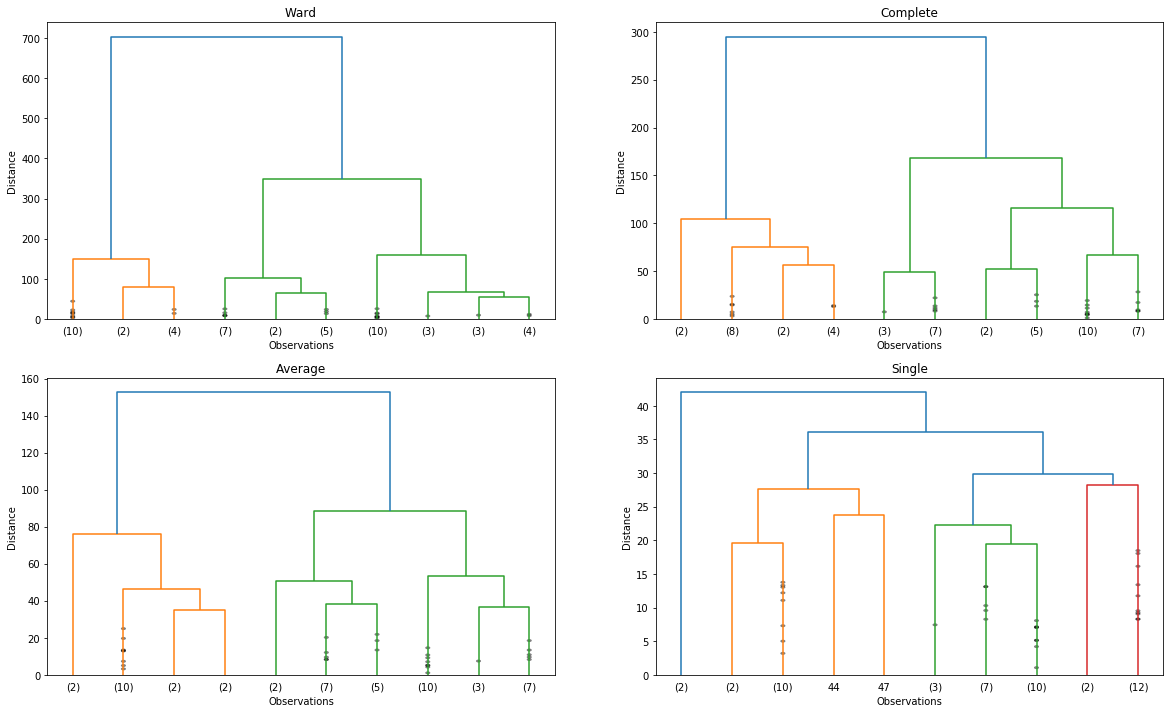

In [29]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

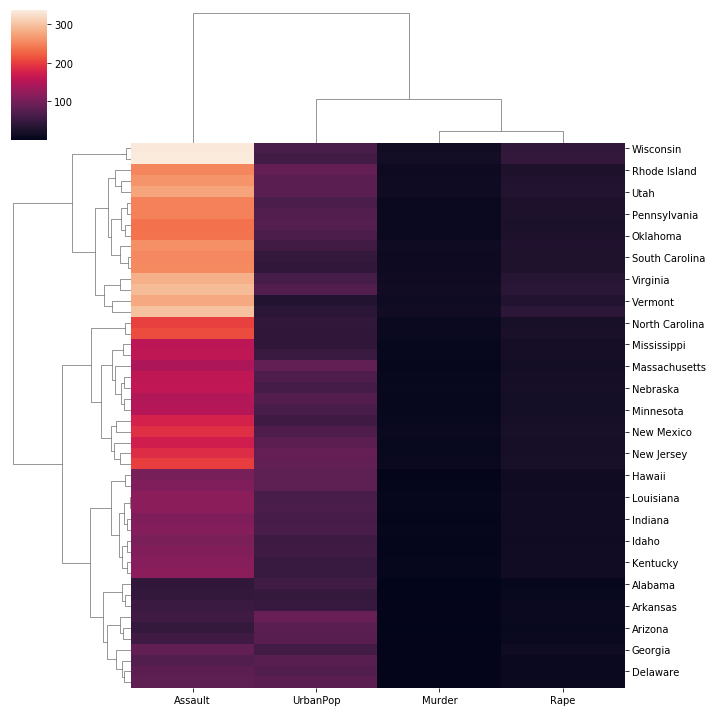

In [30]:
sns.clustermap(df);

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.5025920650864762
Silhouette Score for 5 clusters: 0.45550538459561596
Silhouette Score for 6 clusters: 0.45608767199428596
Silhouette Score for 7 clusters: 0.4616961936914634
Silhouette Score for 8 clusters: 0.45731208153497954
Silhouette Score for 9 clusters: 0.4786579894347773


In [34]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)

In [36]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.8,45,58,7.3
Alaska,2.1,46,48,7.8
Arizona,2.1,48,80,8.3
Arkansas,2.2,53,50,9.3
California,2.2,56,91,9.5


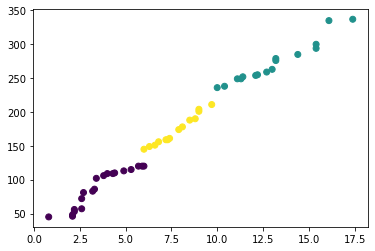

In [35]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, cmap = "viridis")

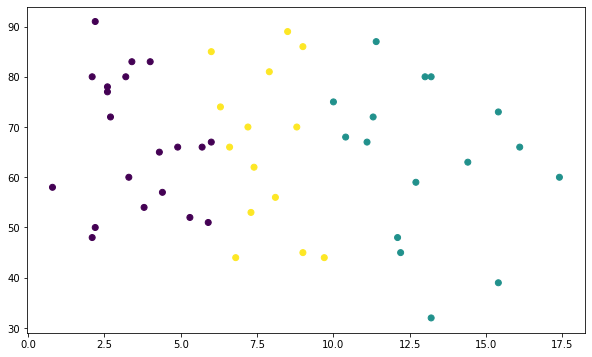

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,2], c = clusters, cmap = "viridis")

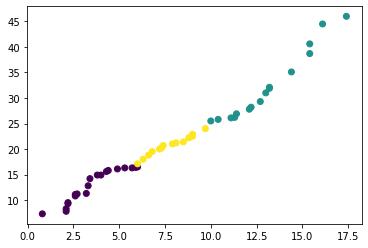

In [39]:
plt.scatter(df.iloc[:,0], df.iloc[:,3], c = clusters, cmap = "viridis")

In [40]:
df["predicted_clusters"] = clusters

In [41]:
df.head()

,Murder,Assault,UrbanPop,Rape,predicted_clusters
Alabama,0.8,45,58,7.3,0
Alaska,2.1,46,48,7.8,0
Arizona,2.1,48,80,8.3,0
Arkansas,2.2,53,50,9.3,0
California,2.2,56,91,9.5,0


In [42]:
df.groupby("predicted_clusters").mean()

,Murder,Assault,UrbanPop,Rape
predicted_clusters,,,,
0,3.575000,87.550000,66.900000,12.820000
1,13.081250,272.562500,63.375000,32.231250
2,7.757143,173.285714,66.071429,20.678571


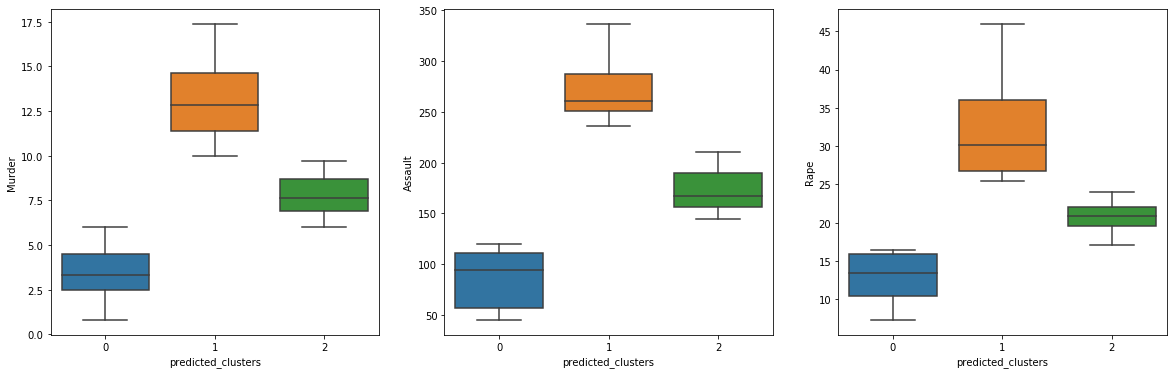

In [43]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "predicted_clusters", data = df)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "predicted_clusters", data = df)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "predicted_clusters", data = df);

In [44]:
df.predicted_clusters.value_counts()

0    20
1    16
2    14
Name: predicted_clusters, dtype: int64

In [45]:
maping = {0 : "low",
          1 : "high",
          2 : "medium"}

In [46]:
df["crime_level"] = df["predicted_clusters"].map(maping)

In [47]:
df.head()

,Murder,Assault,UrbanPop,Rape,predicted_clusters,crime_level
Alabama,0.8,45,58,7.3,0,low
Alaska,2.1,46,48,7.8,0,low
Arizona,2.1,48,80,8.3,0,low
Arkansas,2.2,53,50,9.3,0,low
California,2.2,56,91,9.5,0,low


In [48]:
df.reset_index(inplace=True)

In [49]:
df.head()

,index,Murder,Assault,UrbanPop,Rape,predicted_clusters,crime_level
0,Alabama,0.8,45,58,7.3,0,low
1,Alaska,2.1,46,48,7.8,0,low
2,Arizona,2.1,48,80,8.3,0,low
3,Arkansas,2.2,53,50,9.3,0,low
4,California,2.2,56,91,9.5,0,low


In [50]:
df.rename(columns={'index': 'State'}, inplace=True)

In [51]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,predicted_clusters,crime_level
0,Alabama,0.8,45,58,7.3,0,low
1,Alaska,2.1,46,48,7.8,0,low
2,Arizona,2.1,48,80,8.3,0,low
3,Arkansas,2.2,53,50,9.3,0,low
4,California,2.2,56,91,9.5,0,low


In [52]:
df.sort_values("predicted_clusters")

,State,Murder,Assault,UrbanPop,Rape,predicted_clusters,crime_level
0,Alabama,0.8,45,58,7.3,0,low
19,Maryland,6.0,120,67,16.5,0,low
18,Maine,5.9,120,51,16.4,0,low
17,Louisiana,5.7,120,66,16.3,0,low
15,Kansas,4.9,113,66,16.1,0,low
14,Iowa,4.4,110,57,15.8,0,low
13,Indiana,4.3,109,65,15.6,0,low
12,Illinois,4.0,109,83,14.9,0,low
11,Idaho,3.8,106,54,14.9,0,low
10,Hawaii,3.4,102,83,14.2,0,low
